In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.ma as ma
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from netCDF4 import Dataset
import xarray as xr
import rioxarray

path = r"..\Data\microwave-rs\CumJour-North-ssmi-1979-2022-H19.nc"

## using xarray library

In [12]:
data_xr = xr.load_dataset(path)

In [13]:
bottom_filter = np.datetime64('2019-06-01')
top_filter = np.datetime64('2019-07-31')
data_xr = data_xr.where((bottom_filter <= data_xr["time"]) & (data_xr["time"] <= top_filter), drop=True)
data_xr

<xarray.Dataset>
Dimensions:      (y: 109, x: 60, time: 61, nv: 4)
Coordinates:
  * time         (time) datetime64[ns] 2019-06-01 2019-06-02 ... 2019-07-31
  * x            (x) float64 -6.5e+05 -6.25e+05 -6e+05 ... 8e+05 8.25e+05
  * y            (y) float64 -6.25e+05 -6.5e+05 ... -3.3e+06 -3.325e+06
Dimensions without coordinates: nv
Data variables:
    lat          (y, x, time) float32 81.69 81.69 81.69 ... 58.99 58.99 58.99
    lon          (y, x, time) float32 -90.0 -90.0 -90.0 ... -30.91 -30.91 -30.91
    bounds_lat   (y, x, nv, time) float32 81.69 81.69 81.69 ... 58.91 58.91
    bounds_lon   (y, x, nv, time) float32 -91.12 -91.12 -91.12 ... -31.17 -31.17
    spatial_ref  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    melt         (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan

In [14]:
print(data_xr.dims)
print(data_xr.attrs)
print(data_xr.coords)

Frozen({'y': 109, 'x': 60, 'time': 61, 'nv': 4})
{}
Coordinates:
  * time     (time) datetime64[ns] 2019-06-01 2019-06-02 ... 2019-07-31
  * x        (x) float64 -6.5e+05 -6.25e+05 -6e+05 ... 7.75e+05 8e+05 8.25e+05
  * y        (y) float64 -6.25e+05 -6.5e+05 -6.75e+05 ... -3.3e+06 -3.325e+06


In [16]:
data_xr.to_dataframe()

lat        lon  bounds_lat  \
y          x         time       nv                                     
-625000.0  -650000.0 2019-06-01 0   81.691437 -90.000000   81.689842   
                                1   81.691437 -90.000000   81.853821   
                                2   81.691437 -90.000000   81.689842   
                                3   81.691437 -90.000000   81.529091   
                     2019-06-02 0   81.691437 -90.000000   81.689842   
...                                       ...        ...         ...   
-3325000.0  825000.0 2019-07-30 3   58.985001 -30.913275   58.906670   
                     2019-07-31 0   58.985001 -30.913275   59.115292   
                                1   58.985001 -30.913275   59.062782   
                                2   58.985001 -30.913275   58.854580   
                                3   58.985001 -30.913275   58.906670   

                                    bounds_lon  spatial_ref  melt  
y          x         time       nv                                 
-625000.0  -650000.0 2019-06-01 0   -91.123306          0.0   0.0  
                                1   -90.000000          0.0   0.0  
                                2   -88.876694          0.0   0.0  
                                3   -90.000000          0.0   0.0  
                     2019-06-02 0   -91.123306          0.0   0.0  
...                                        ...          ...   ...  
-3325000.0  825000.0 2019-07-30 3   -31.165148          0.0   NaN  
                     2019-07-31 0   -31.065165          0.0   NaN  
                                1   -30.660072          0.0   NaN  
                                2   -30.762720          0.0   NaN  
                                3   -31.165148          0.0   NaN  

[1595760 rows x 6 columns]

In [15]:
lat_xr = data_xr.variables['lat'][:]
lon_xr = data_xr.variables['lon'][:]
time_xr = data_xr.variables['time'][:]
bounds_lat_xr = data_xr.variables['bounds_lat'][:]
bounds_lon_xr = data_xr.variables['bounds_lon'][:] 
x_xr = data_xr.variables['x'][:]
y_xr = data_xr.variables['y'][:] 
spatial_ref_xr = data_xr.variables['spatial_ref'][:] 
melt_xr = data_xr.variables['melt'][:] 

## using netCDF4 library

In [21]:
data_nc = Dataset(path, 'r')

In [22]:
data_nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): y(109), x(60), time(15663), nv(4)
    variables(dimensions): float32 lat(y, x), float32 lon(y, x), int64 time(time), float32 bounds_lat(y, x, nv), float32 bounds_lon(y, x, nv), float64 x(x), float64 y(y), int64 spatial_ref(), int8 melt(time, y, x)
    groups: 

In [23]:
lat = data_nc.variables['lat'][:]
lon = data_nc.variables['lon'][:]
time = data_nc.variables['time'][:]
bounds_lat = data_nc.variables['bounds_lat'][:]
bounds_lon = data_nc.variables['bounds_lon'][:] 
x = data_nc.variables['x'][:]
y = data_nc.variables['y'][:] 
spatial_ref = data_nc.variables['spatial_ref'][:] 
melt = data_nc.variables['melt'][:] 

In [39]:
melt

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[0, 0, 0, ..., --, --, --],
         [0, 0, 0, ..., --, --, --],
         [0, 0, 0, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[0, 0, 0, ..., --, --, --],
         [0, 0, 0, ..., --, --, --],
         [0, 0, 0, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
        

In [11]:
ma.getdata(melt)

array([[[-10, -10, -10, ..., -10, -10, -10],
        [-10, -10, -10, ..., -10, -10, -10],
        [-10, -10, -10, ..., -10, -10, -10],
        ...,
        [-10, -10, -10, ..., -10, -10, -10],
        [-10, -10, -10, ..., -10, -10, -10],
        [-10, -10, -10, ..., -10, -10, -10]],

       [[  0,   0,   0, ..., -10, -10, -10],
        [  0,   0,   0, ..., -10, -10, -10],
        [  0,   0,   0, ..., -10, -10, -10],
        ...,
        [-10, -10, -10, ..., -10, -10, -10],
        [-10, -10, -10, ..., -10, -10, -10],
        [-10, -10, -10, ..., -10, -10, -10]],

       [[  0,   0,   0, ..., -10, -10, -10],
        [  0,   0,   0, ..., -10, -10, -10],
        [  0,   0,   0, ..., -10, -10, -10],
        ...,
        [-10, -10, -10, ..., -10, -10, -10],
        [-10, -10, -10, ..., -10, -10, -10],
        [-10, -10, -10, ..., -10, -10, -10]],

       ...,

       [[-10, -10, -10, ..., -10, -10, -10],
        [-10, -10, -10, ..., -10, -10, -10],
        [-10, -10, -10, ..., -10, -10, -10

In [27]:
melt[1]

masked_array(
  data=[[0, 0, 0, ..., --, --, --],
        [0, 0, 0, ..., --, --, --],
        [0, 0, 0, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-10,
  dtype=int8)

## Visualization for June/July 2019

C:\Users\ninaz\AppData\Local\Temp\ipykernel_13968\3918733786.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(figsize=(5, 5),  nrows=2, ncols=1,gridspec_kw={'height_ratios': [20,1.5]},constrained_layout=True) #


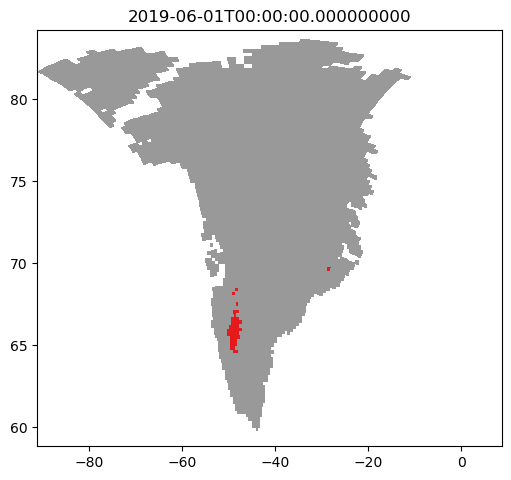

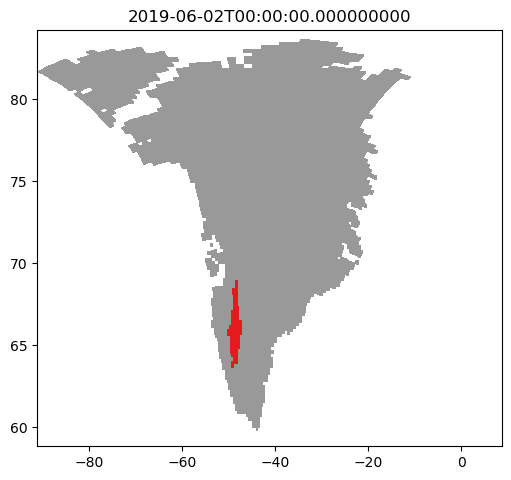

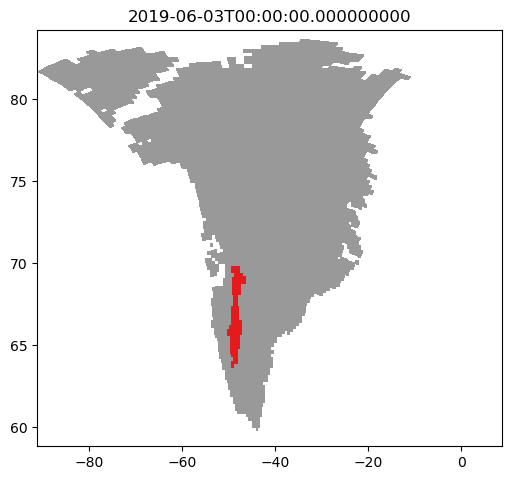

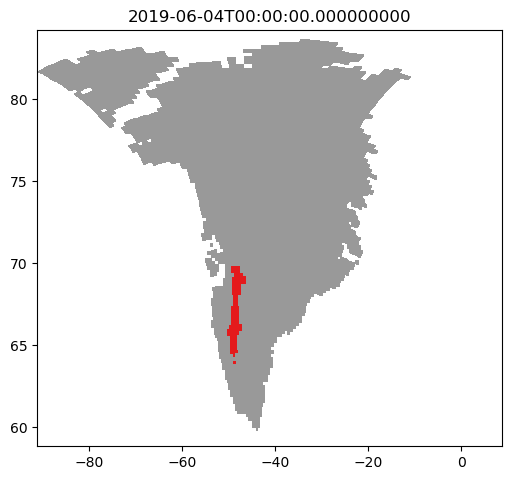

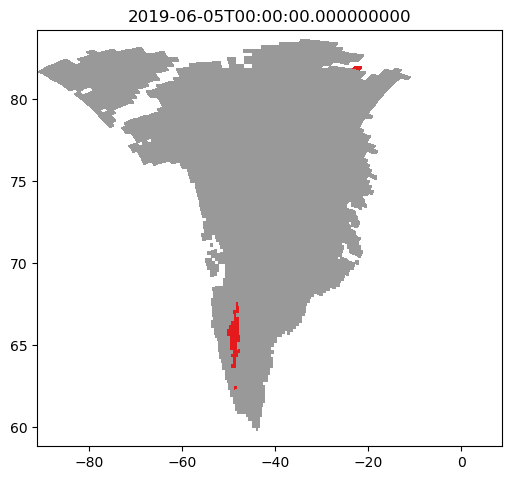

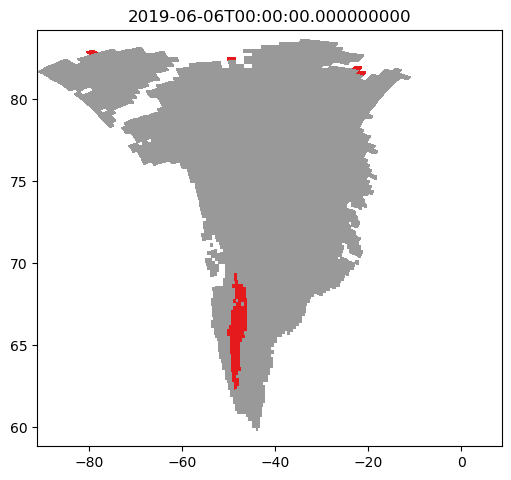

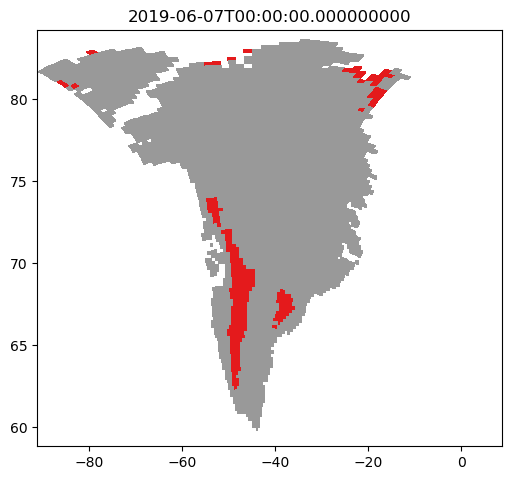

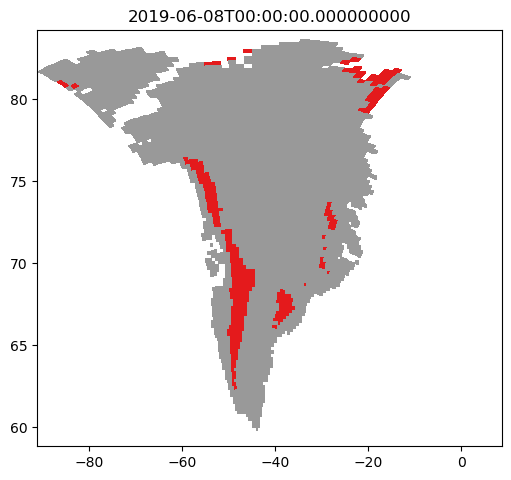

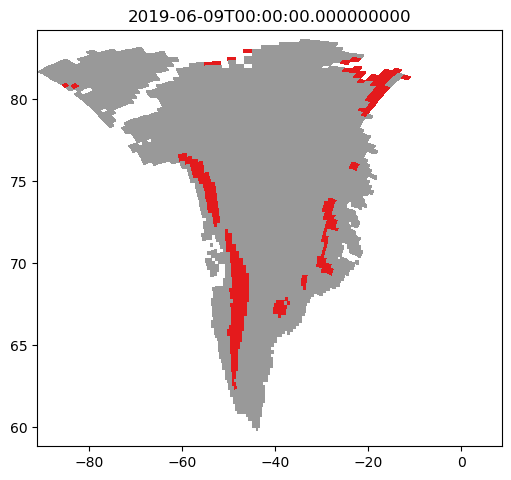

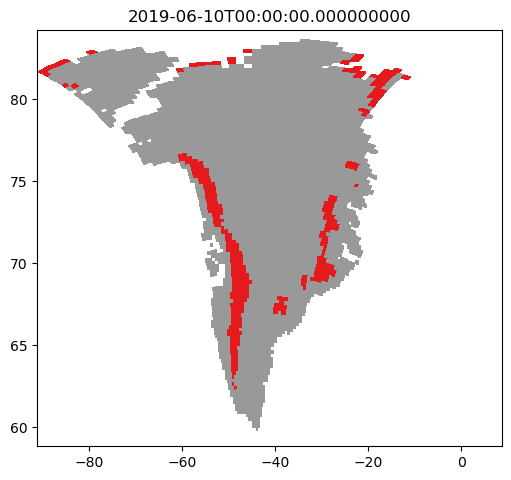

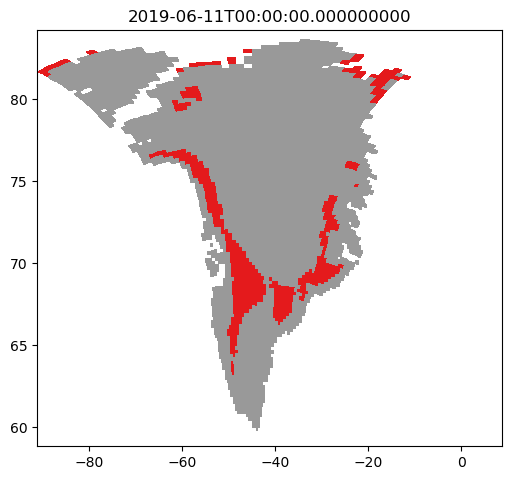

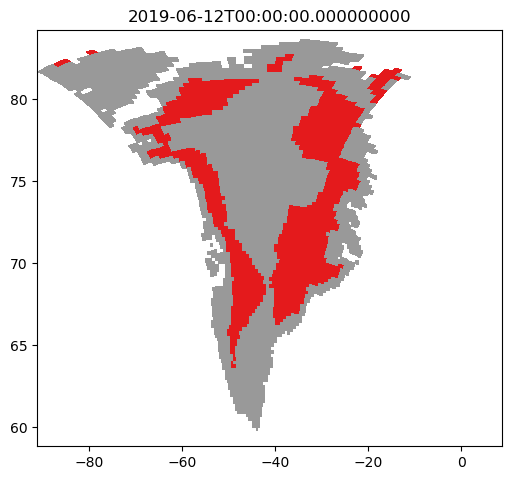

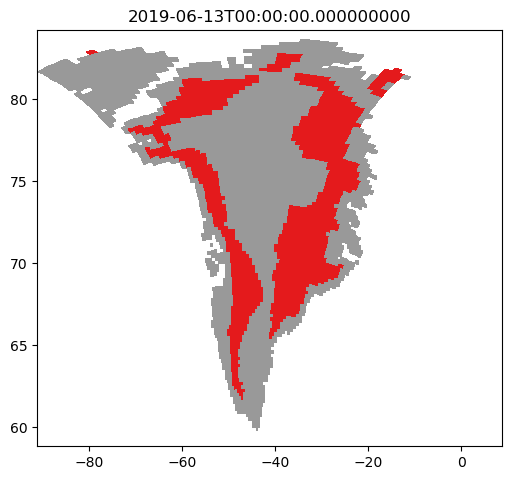

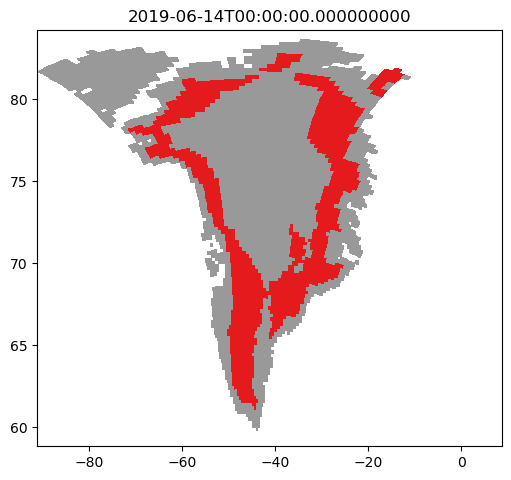

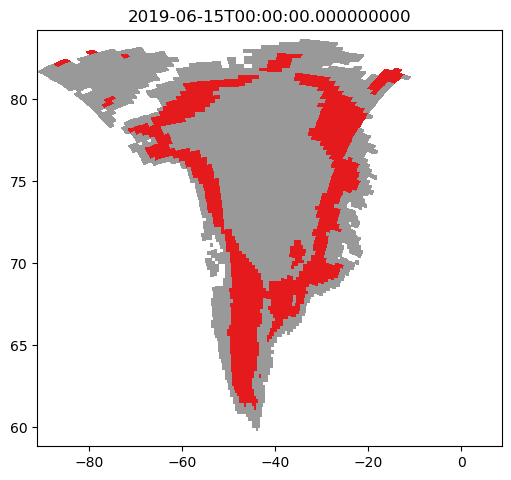

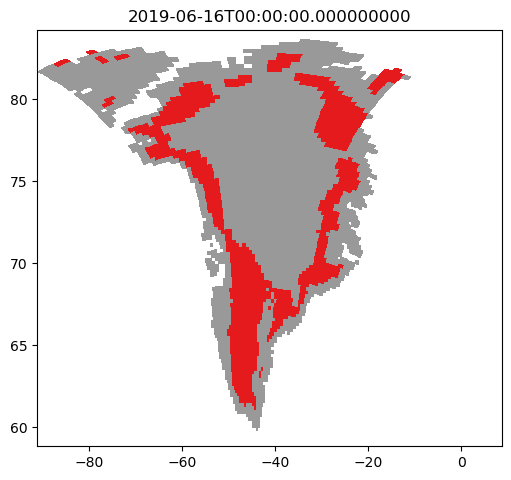

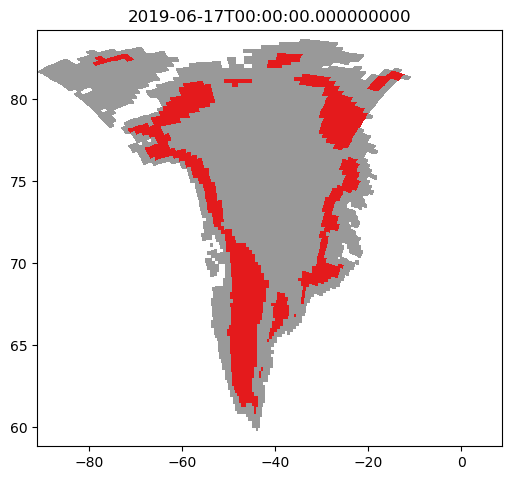

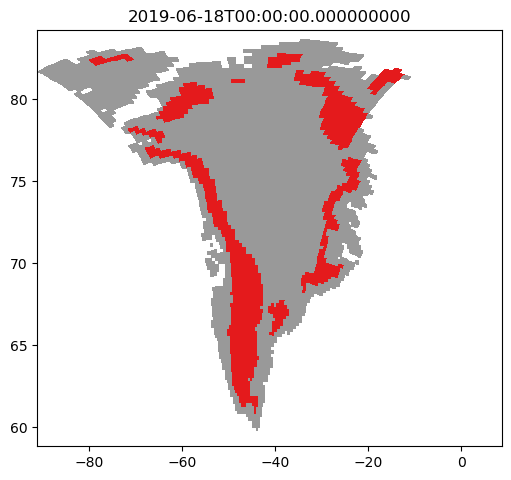

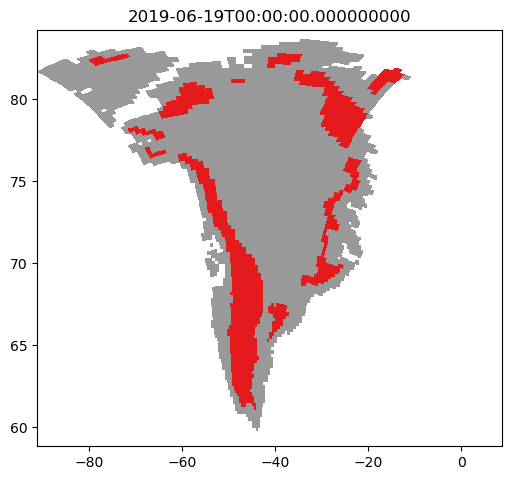

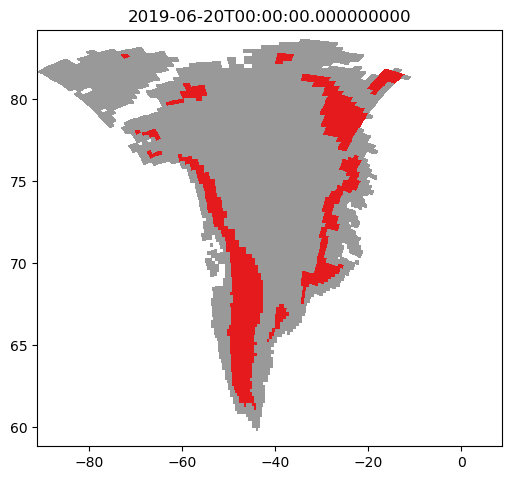

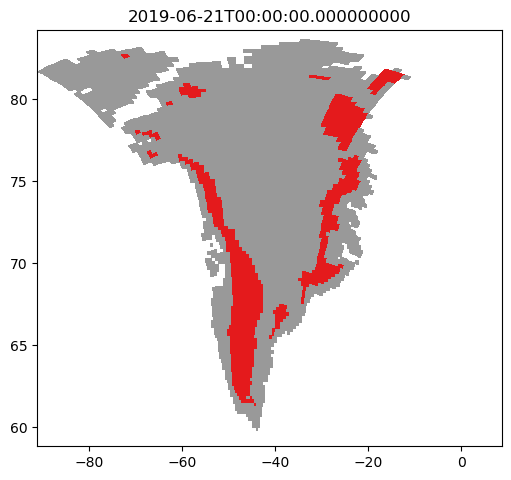

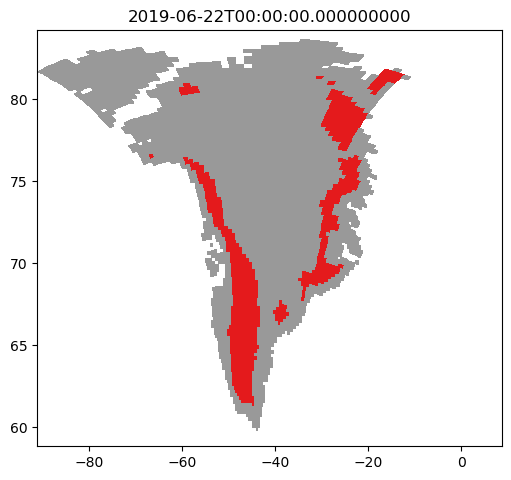

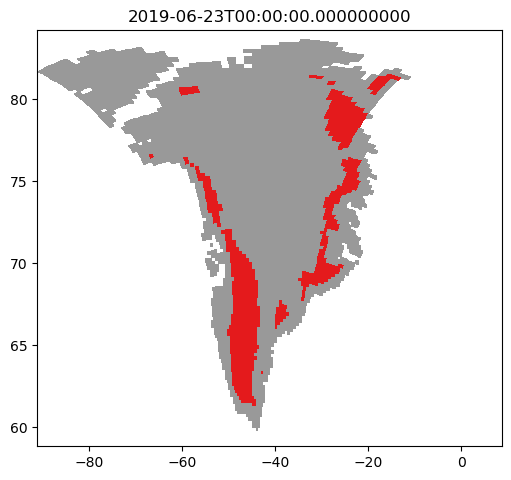

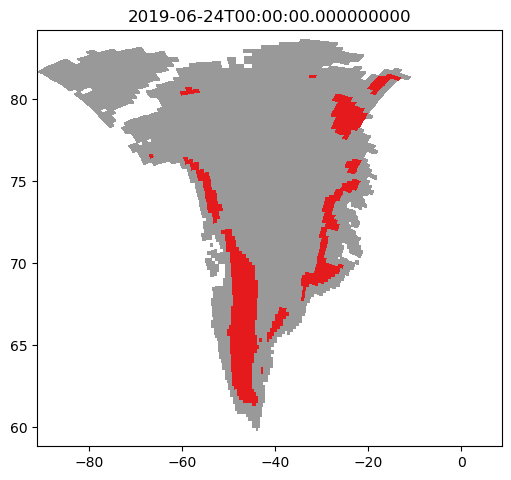

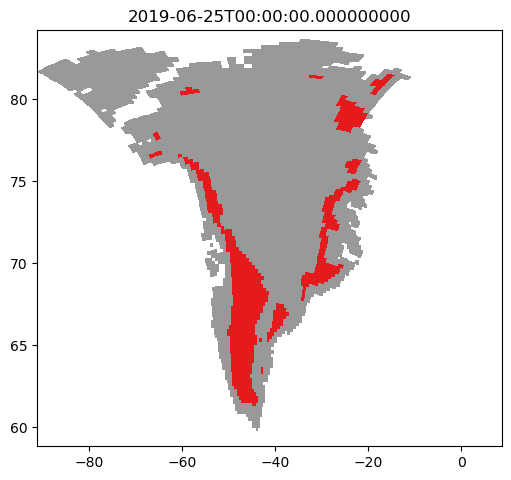

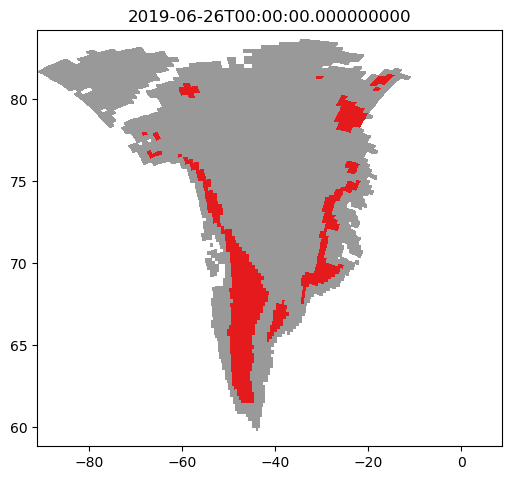

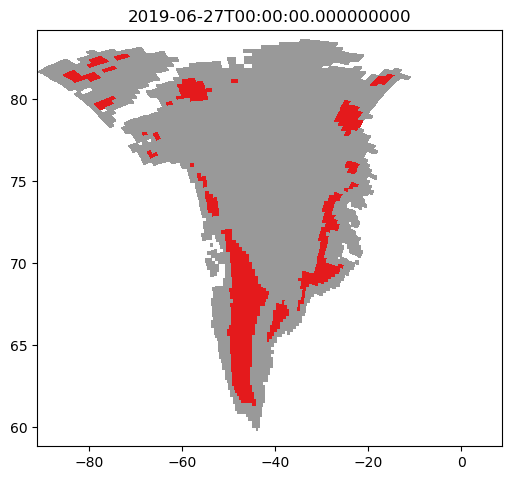

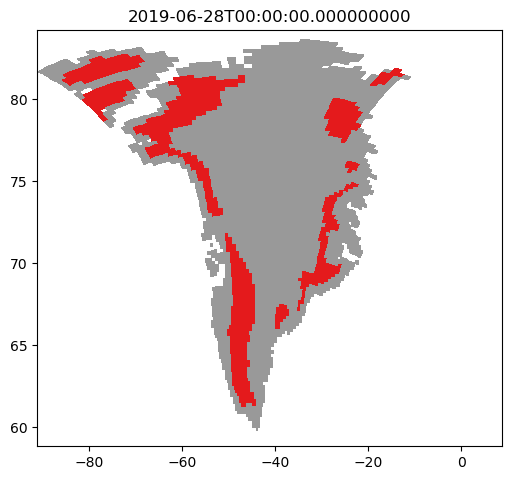

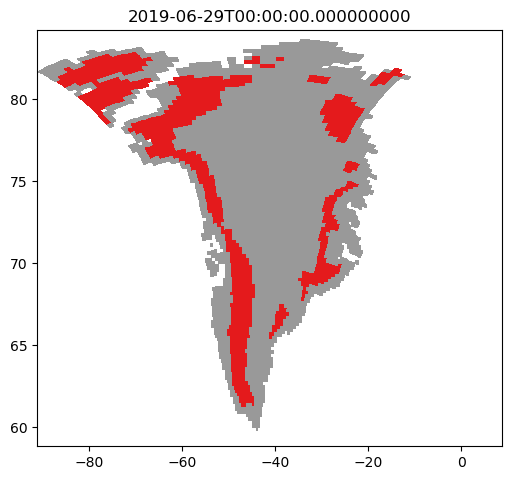

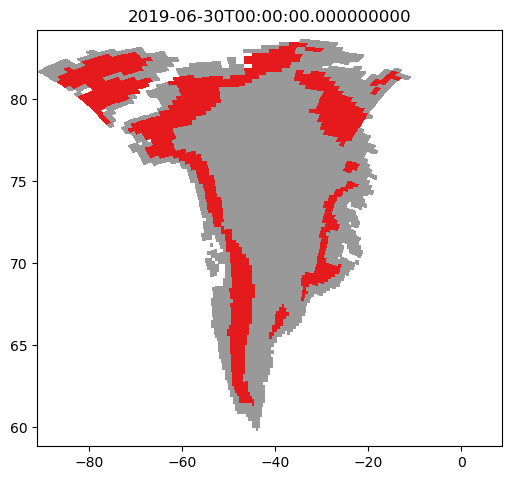

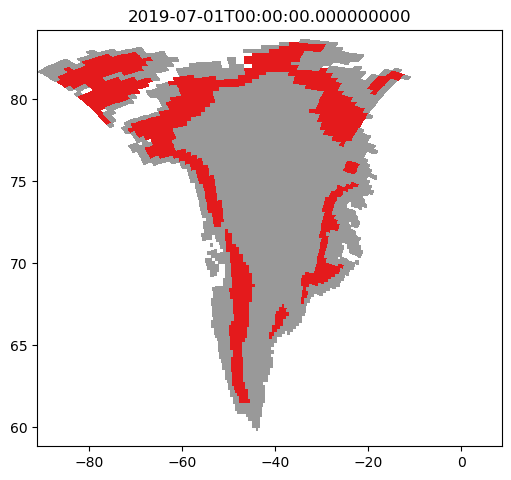

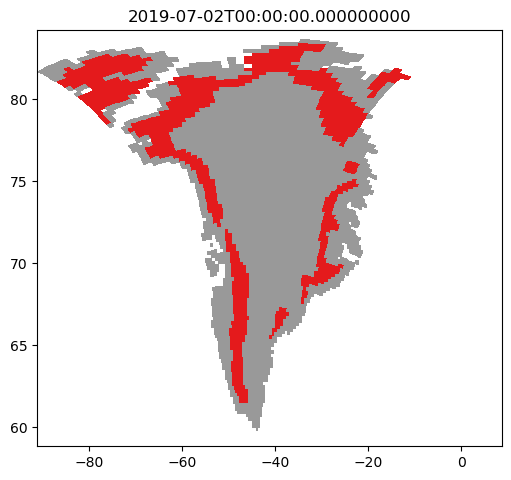

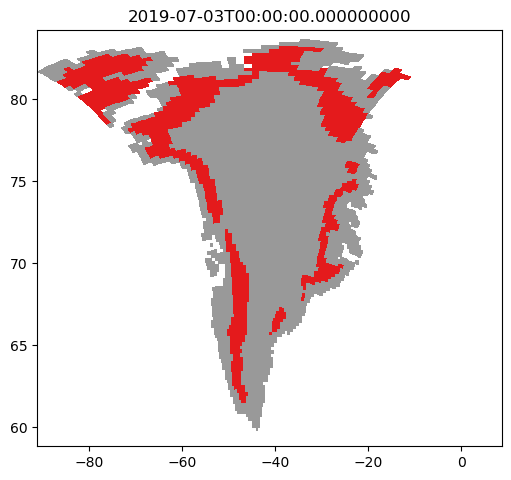

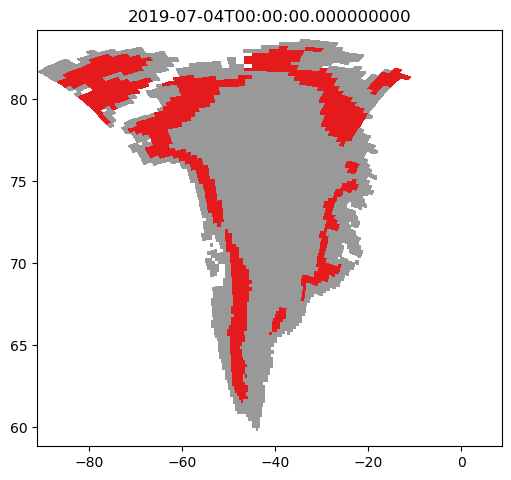

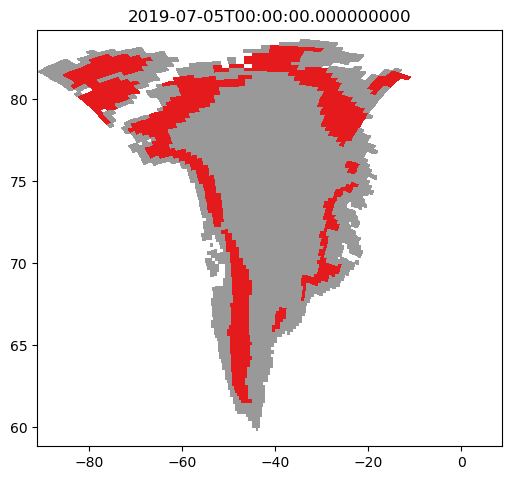

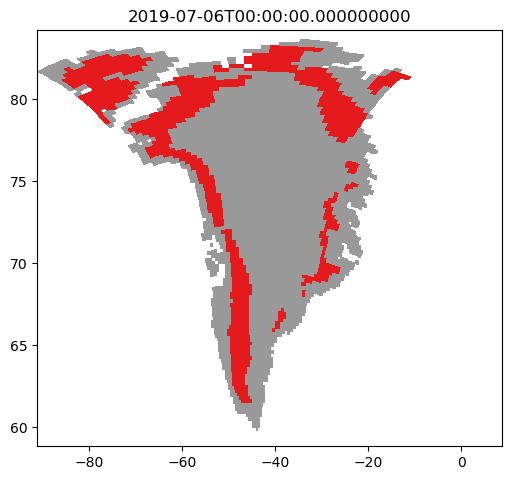

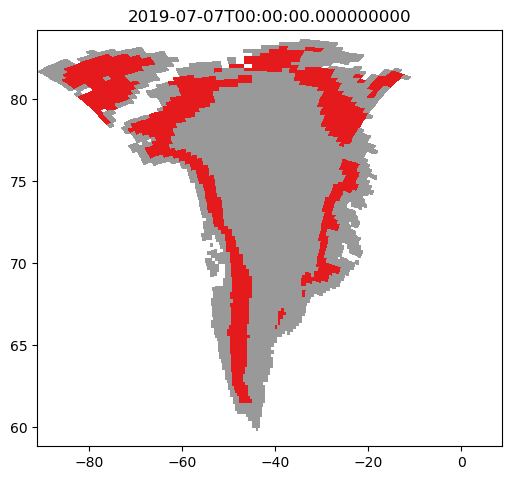

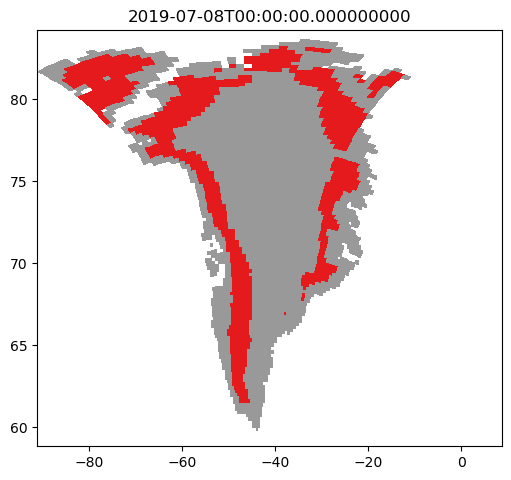

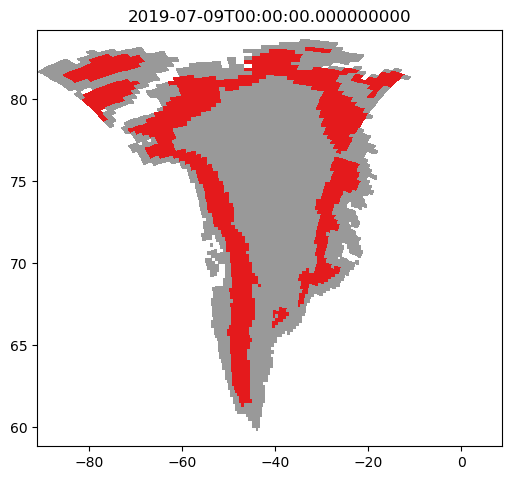

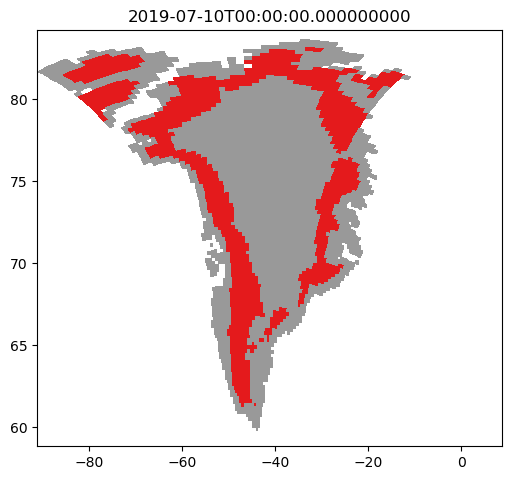

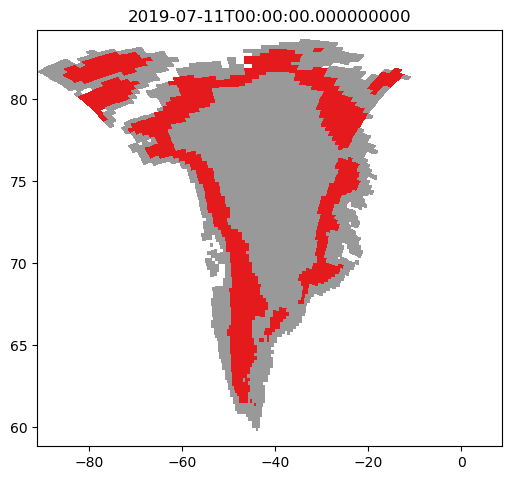

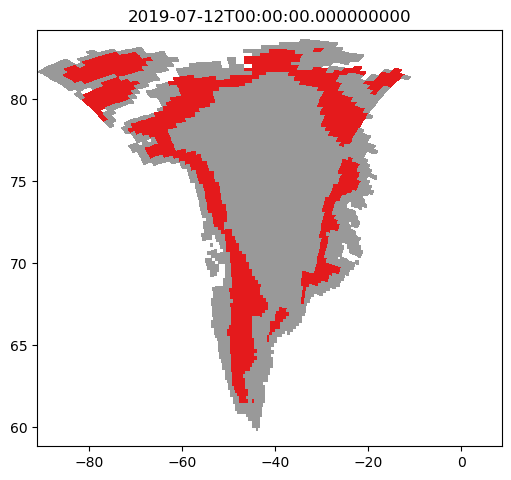

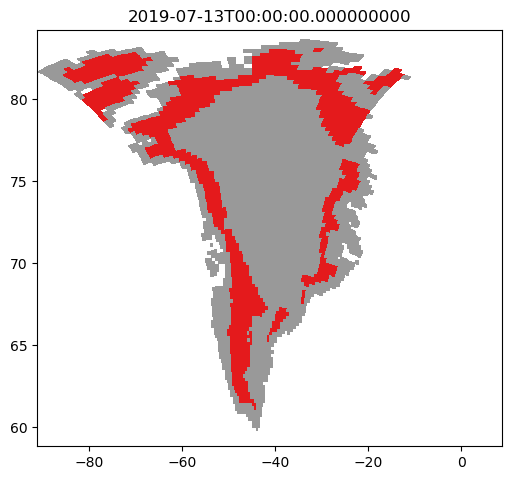

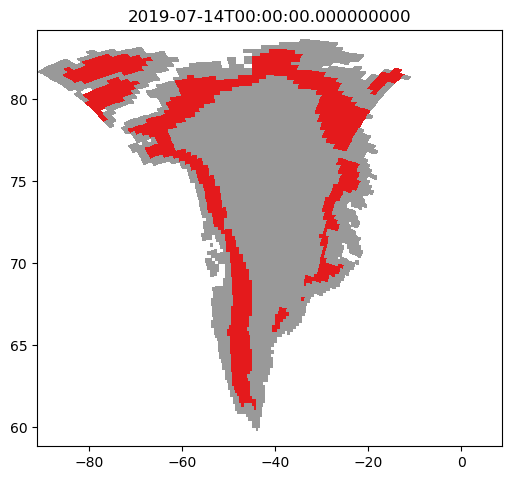

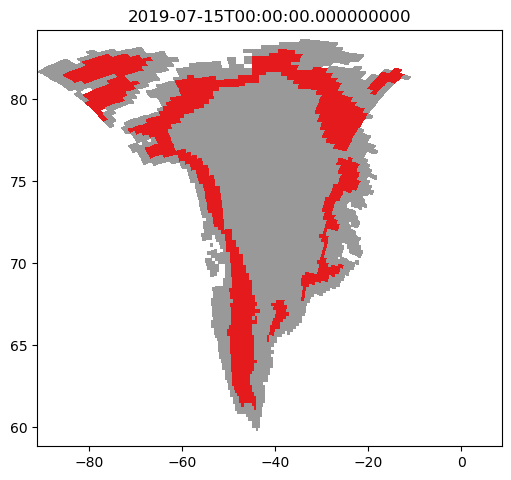

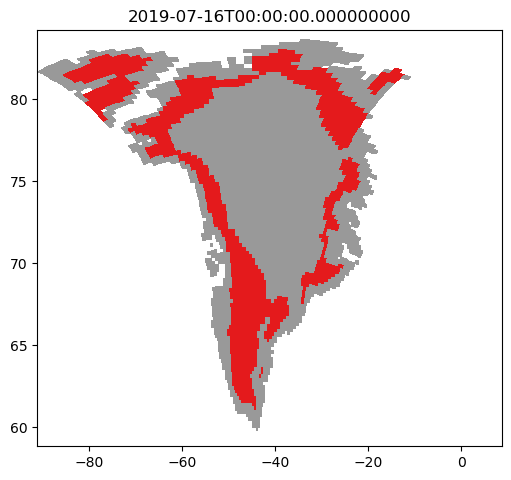

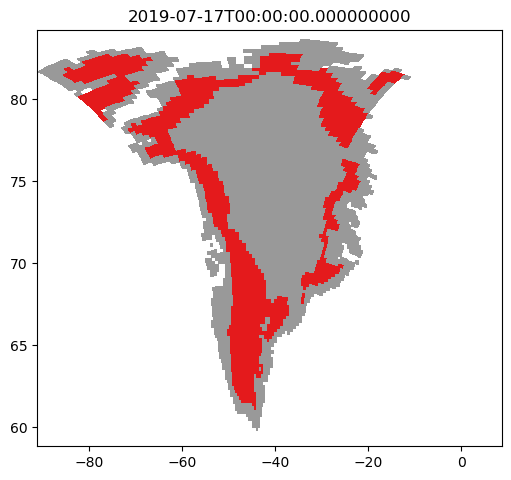

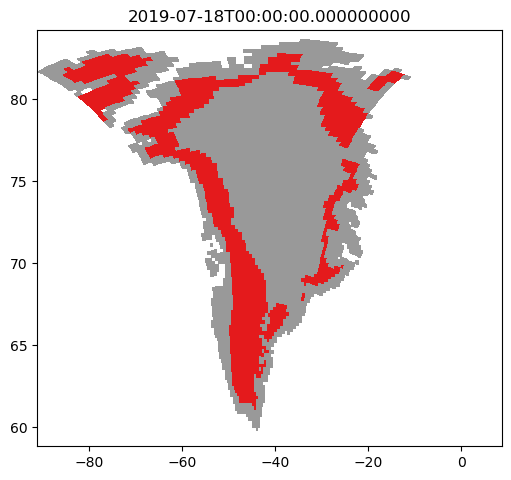

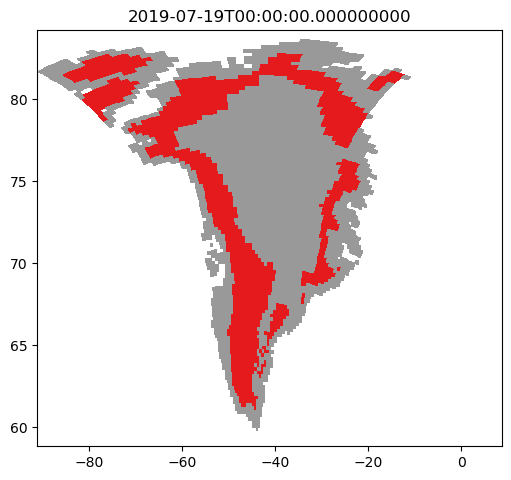

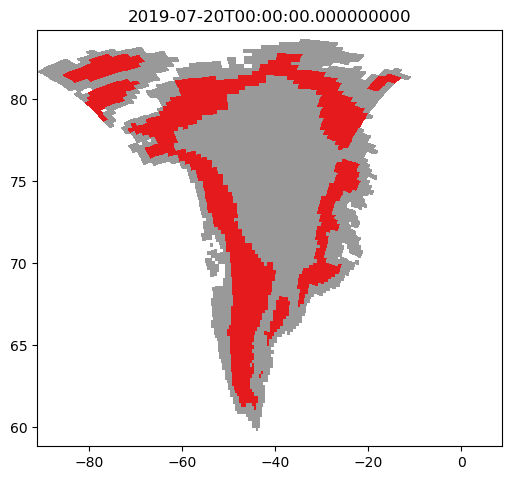

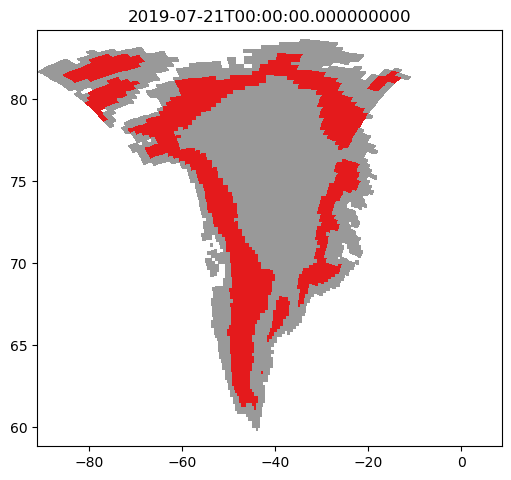

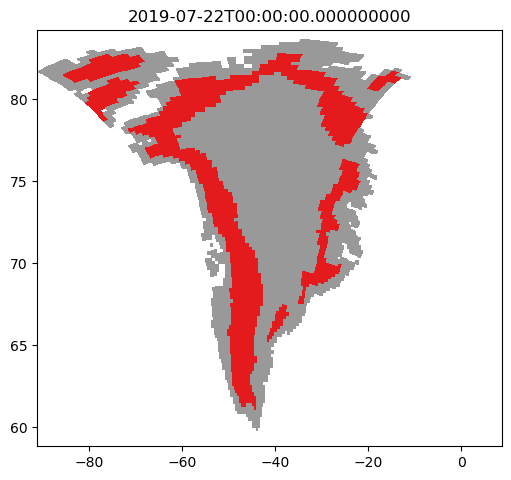

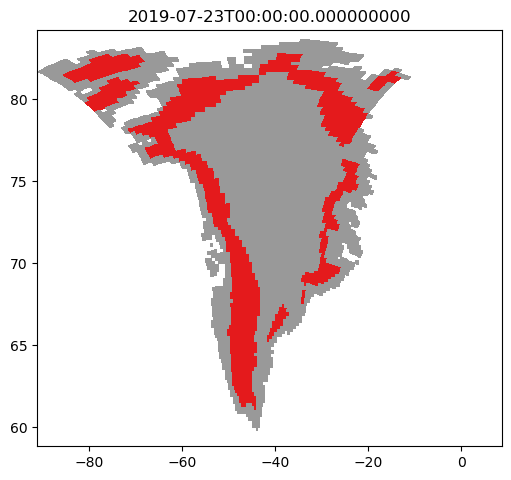

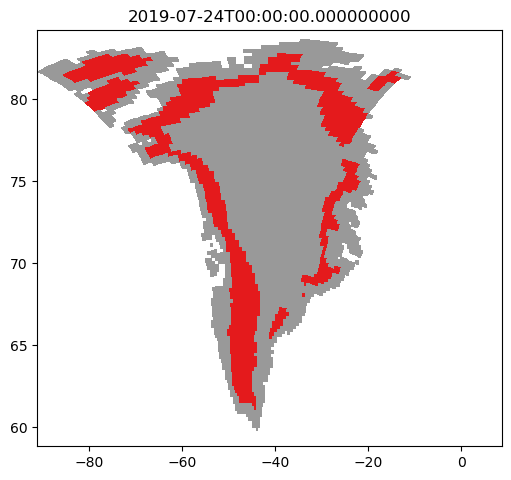

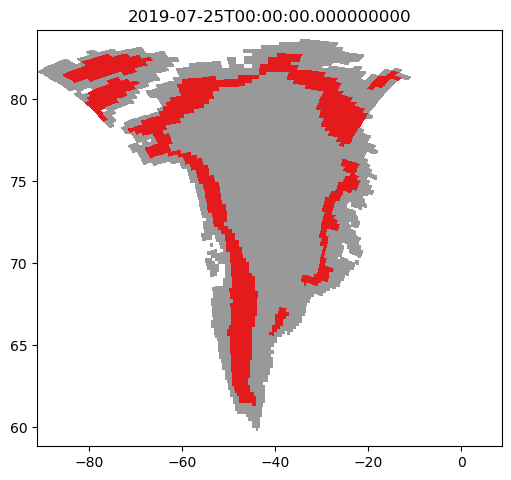

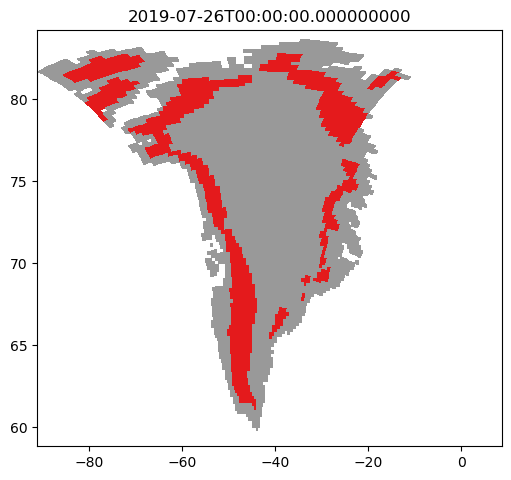

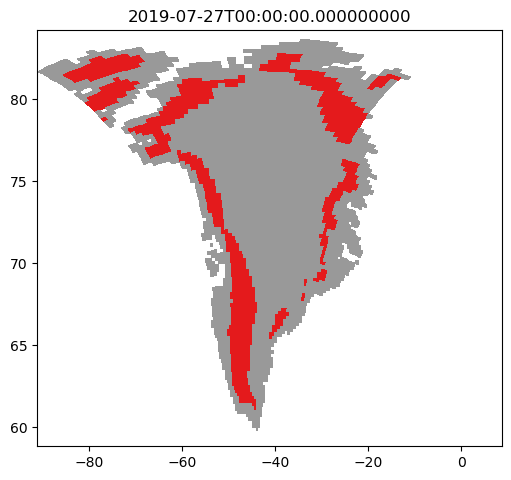

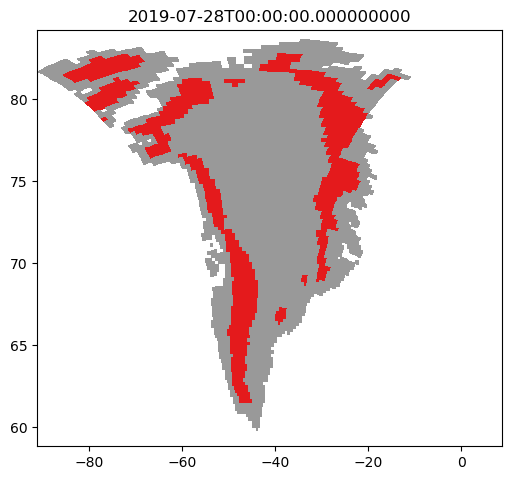

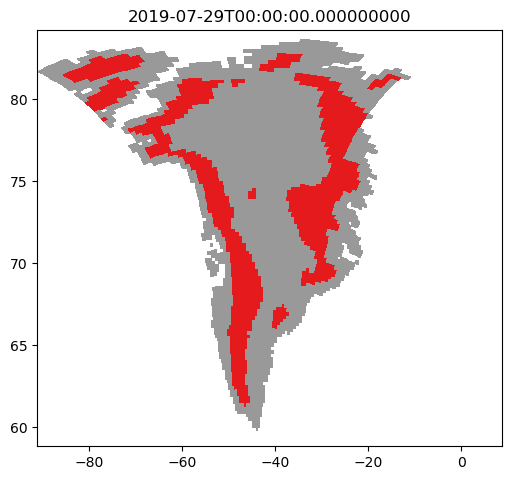

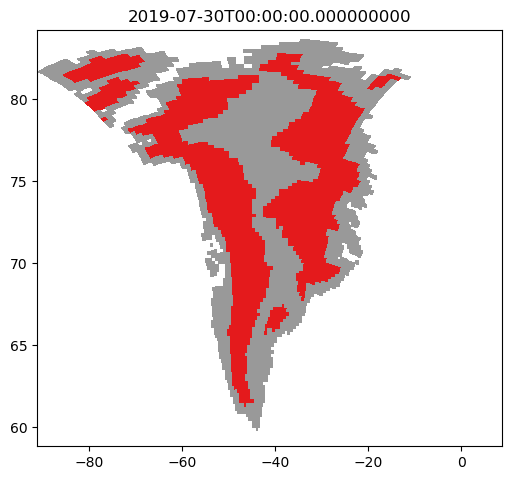

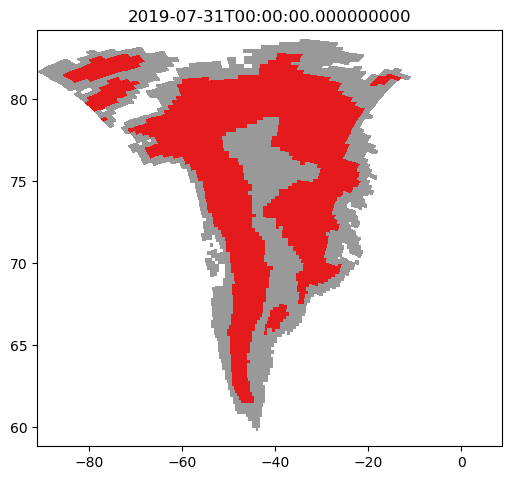

In [24]:
for i in range(len(melt_xr)):
    fig, axs = plt.subplots(figsize=(5, 5),  nrows=2, ncols=1,gridspec_kw={'height_ratios': [20,1.5]},constrained_layout=True) #
    plot = axs[0].pcolormesh(lon, lat, np.ma.getdata(melt_xr[i]), cmap='Set1_r') # 'viridis'
    axs[0].set_title(time_xr.values[i])
    cbar=fig.colorbar(plot, cax=axs[1], extend='both', orientation='horizontal')
    cbar.remove()